# Classifier Series - Decision Trees

**Creator**: Muhammad Bilal Alam

## What are Decision Trees?

Decision trees are a type of machine learning algorithm that helps us make decisions by breaking down a complex problem into smaller, more manageable pieces. Decision trees work by creating a tree-like model of decisions and their possible consequences. Each decision or event is represented by a node on the tree, and the branches represent the possible outcomes or consequences of that decision. At the end of each branch, we reach a final decision or prediction.

The formula for a decision tree is based on recursive binary splitting of the data using the most significant feature at each node. The basic equation for building a decision tree is as follows:

- T(x) = f1(x) if x < k1  
- T(x) = f2(x) if k1 ≤ x < k2  
- T(x) = f3(x) if k2 ≤ x < k3  
- ...  
- T(x) = fn(x) if x ≥ kn

Where `T(x)` is the predicted target value for the input `x`, `f1(x)` to `fn(x)` are the decision rules for each node in the tree, and `k1` to `kn` are the thresholds for each split in the tree.

The decision rules for each node are determined by the most significant feature at that node, as determined by a metric such as information gain or Gini impurity. The thresholds for each split are determined by the values of the feature that result in the greatest reduction in impurity or entropy.

The goal of building a decision tree is to create a model that accurately predicts the target value for new input data, while minimizing overfitting and maintaining simplicity. This is achieved by controlling the depth and complexity of the tree, and by using pruning and other techniques to reduce overfitting.

---

## When to use decision trees:
- When the problem involves making decisions based on a set of rules or criteria that can be easily represented as a tree.
- When the data has a clear structure that can be easily partitioned into discrete categories or groups.
- When the data has a mix of categorical and numerical features, and the decision rules are based on a combination of both.
- When interpretability is important, and we want to be able to understand and explain the decision-making process.

---

## When not to use decision trees:
- When the problem is too complex or the data is too noisy to be easily represented as a tree.
- When the data has many features and the decision rules are not clear or simple, as the resulting tree may be too large and difficult to interpret.
- When the data has a high degree of correlation between features, as this can lead to overfitting and reduce the performance of the tree.
- When the goal is to predict continuous or real-valued outputs, as decision trees are designed to work with discrete categories or groups.

---

## The Titanic Dataset:

The Titanic dataset is a classic dataset in machine learning and data science. It contains information on the passengers aboard the Titanic, including their demographic and ticket information, as well as whether or not they survived the sinking of the ship. The dataset is often used as a benchmark dataset for classification tasks in machine learning.

The dataset contains 14 features, which are as follows:

- `pclass`: Passenger class (1st = 1st class, 2 = 2nd class, 3 = 3rd class)
- `name`: Name of the passenger
- `sex`: Sex of the passenger
- `age`: Age of the passenger
- `sibsp`: Number of siblings/spouses the passenger had aboard the Titanic
- `parch`: Number of parents/children the passenger had aboard the Titanic
- `ticket`: Ticket number of the passenger
- `fare`: Fare paid by the passenger
- `cabin`: Cabin number of the passenger
- `embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- `boat`: Lifeboat number (if the passenger survived)
- `body`: Body number (if the passenger did not survive and their body was recovered)
- `home.dest`: Home or destination of the passenger
- `target`: Binary variable that indicates whether a passenger survived the sinking of the Titanic (1) or not (0)


In [33]:
# Import Necessary Libraries

# Data handling and visualization libraries
import pandas as pd                  # For data manipulation
import numpy as np                   # For numerical operations
import seaborn as sns                # For data visualization
sns.set_style('whitegrid')          # Set seaborn plot style
import matplotlib.pyplot as plt      # For plotting graphs

# Scikit-learn libraries for model and evaluation
from sklearn.datasets import fetch_openml         # To load datasets from OpenML
from sklearn.tree import DecisionTreeClassifier   # Decision Tree algorithm
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and tuning
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
) # Evaluation metrics

### Load the Data

In [2]:
# Load the Titanic dataset from OpenML
titanic = fetch_openml(name='titanic', version=1)

# Convert the data to a pandas dataframe
df = pd.DataFrame(data=titanic.data, columns=titanic.feature_names)
df['target'] = titanic.target

# Print the first five rows of the dataframe
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,target
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


### Check the Shape of Dataset

In [3]:
df.shape

(1309, 14)

### View Summary of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  target     1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


### Showing Statistical Summary of the Dataset

The `.describe().T` method gives a statistical summary (count, mean, standard deviation, min, max, and quartiles) for all numerical columns in the dataset. Transposing with `.T` improves readability by showing features as rows.


In [5]:
# Display statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


### EDA: View the distribution of the target variable

We will now visualize how many passengers survived and how many didn’t. This helps us understand class balance in our target variable.


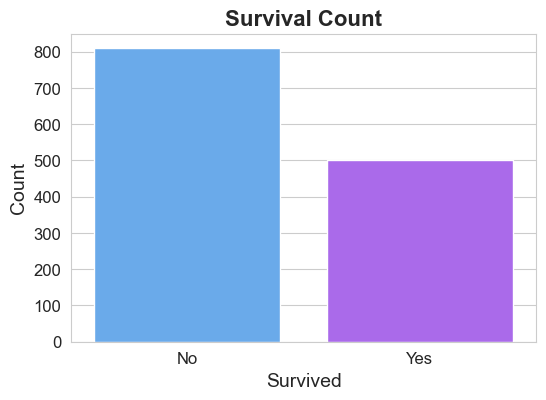

In [7]:
# Visualize the distribution of the target variable (Survived vs Not Survived)
plt.figure(figsize=(6,4))
sns.countplot(x='target', hue='target', data=df, palette='cool', legend=False)
plt.title('Survival Count', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0,1], ['No', 'Yes'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### EDA: Visualize the Distribution of Age by Survival Status

This plot shows how age is distributed among passengers who survived versus those who did not. It helps assess whether age played a role in survival.

### Observation:
- Younger passengers (ages 0–10) had higher survival rates relative to their group size.
  
- Most passengers were between 20 and 40 years old, and within this group, more did not survive than survived.
  
- Survivors generally skew slightly younger, but survival occurred across all age groups.


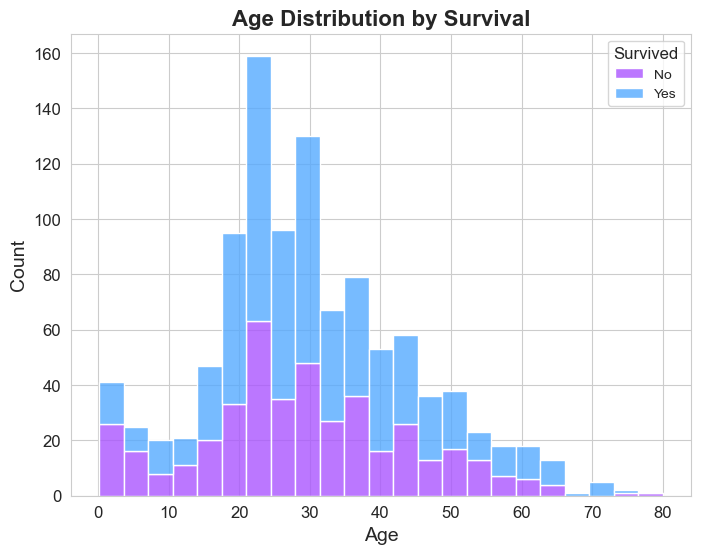

In [8]:
# Visualize the distribution of age by survival status
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', palette='cool', alpha=0.8)
plt.title('Age Distribution by Survival', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['No', 'Yes'], title='Survived', title_fontsize=12)
plt.show()


### EDA: Visualize the Distribution of Fare by Survival Status

This plot shows how ticket fare varied among passengers and whether there’s any correlation between fare paid and survival. Higher fares may indicate first-class passengers who had better survival rates.

### Observation:

- Most passengers paid lower fares (under $100), where the survival count was still significant.

- Higher fare ranges (above $100) show noticeably more survivors, suggesting passengers who paid more were more likely to survive.

- This indicates a potential correlation between fare paid and passenger class/survival rate.


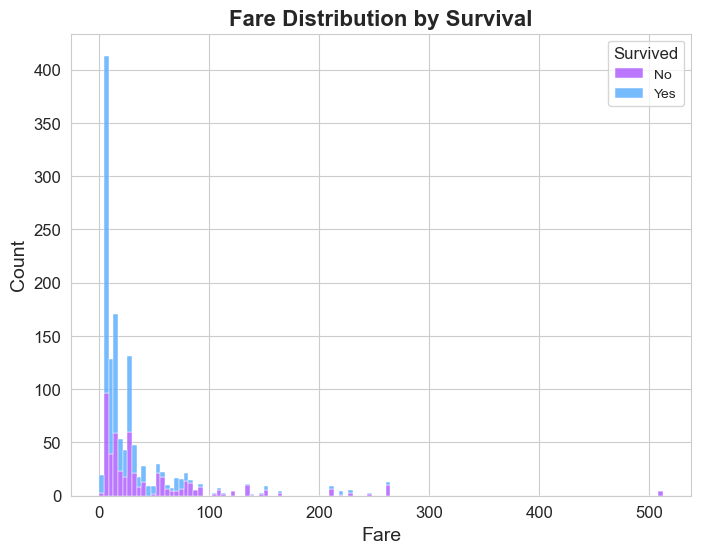

In [9]:
# Visualize the distribution of fare by survival status
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='fare', hue='target', multiple='stack', palette='cool', alpha=0.8)
plt.title('Fare Distribution by Survival', fontsize=16, fontweight='bold')
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['No', 'Yes'], title='Survived', title_fontsize=12)
plt.show()

### EDA: Visualize the Distribution of Passenger Class by Survival Status

This chart helps analyze whether passengers in higher classes had better chances of survival.

###  Observation: 

- **1st class passengers had the highest survival rate**, with survivors outnumbering non-survivors.
- In **2nd class**, survival and non-survival counts are relatively balanced.
- **3rd class passengers faced the highest mortality**, with far more deaths than survivors.

This indicates that **passenger class was a significant factor in survival**, possibly due to differences in cabin location and access to lifeboats.



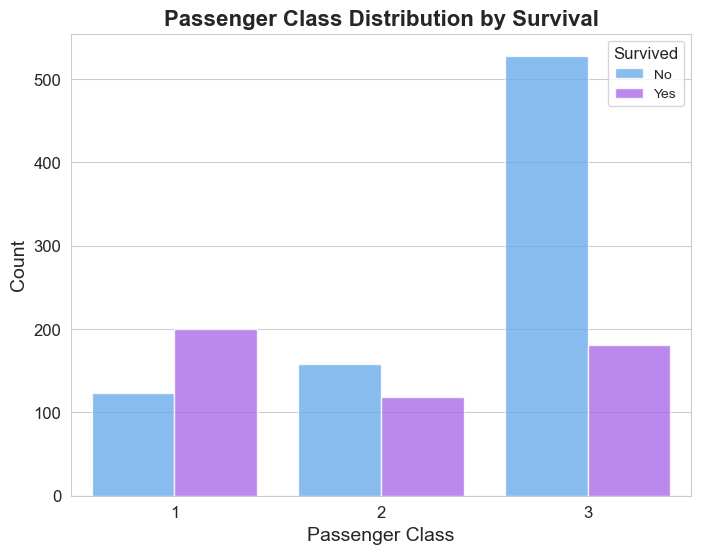

In [10]:
# Visualize the distribution of passenger class by survival status
plt.figure(figsize=(8,6))
sns.countplot(x='pclass', hue='target', data=df, palette='cool', alpha=0.8)
plt.title('Passenger Class Distribution by Survival', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['No', 'Yes'], title='Survived', title_fontsize=12)
plt.show()

### EDA: Visualize the Distribution of Sex by Survival Status

This plot helps analyze survival patterns between male and female passengers.

### Observation: S

- **Females had significantly higher survival rates** than males.
- The majority of **male passengers did not survive**, whereas most **female passengers did survive**.
- This strongly suggests that **gender played a critical role** in survival, possibly due to priority given to women during evacuation.


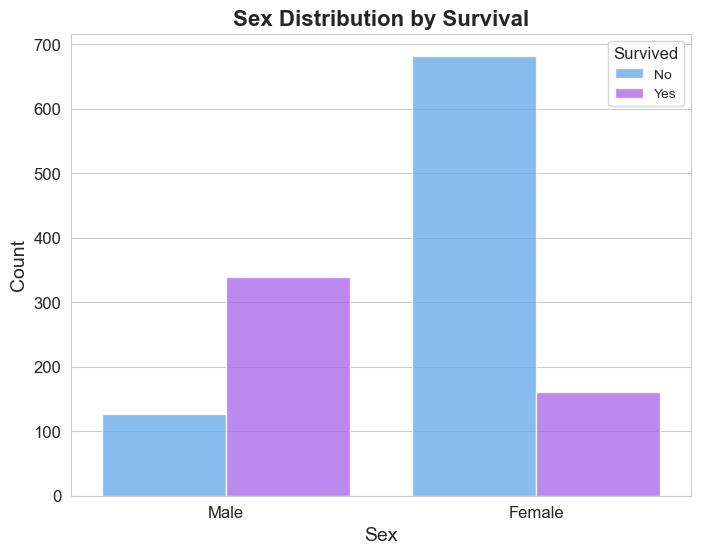

In [12]:
# Visualize the distribution of sex by survival status
plt.figure(figsize=(8,6))
sns.countplot(x='sex', hue='target', data=df, palette='cool', alpha=0.8)
plt.title('Sex Distribution by Survival', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['No', 'Yes'], title='Survived', title_fontsize=12)
plt.show()


### EDA: Visualize the Distribution of Siblings/Spouses by Survival Status

This plot shows how the number of siblings/spouses aboard affected a passenger's chance of survival. It helps identify whether traveling with family influenced outcomes.

### Observation:

- **Passengers with no siblings/spouses had the highest count**, but their survival rate was relatively lower.
- Having **1 sibling or spouse** seemed to slightly improve survival chances.
- Passengers with **more than 2** siblings/spouses had **very low survival rates**, possibly due to difficulty evacuating as a group.


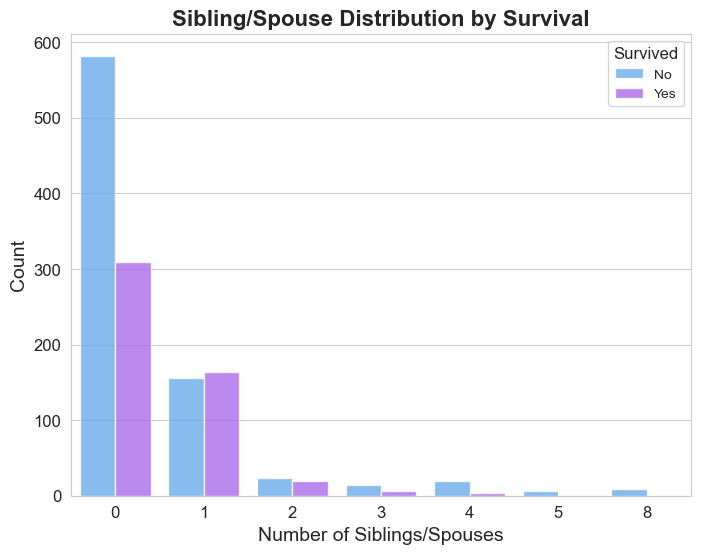

In [13]:
# Visualize the distribution of siblings/spouses by survival status
plt.figure(figsize=(8,6))
sns.countplot(x='sibsp', hue='target', data=df, palette='cool', alpha=0.8)
plt.title('Sibling/Spouse Distribution by Survival', fontsize=16, fontweight='bold')
plt.xlabel('Number of Siblings/Spouses', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['No', 'Yes'], title='Survived', title_fontsize=12)
plt.show()


### EDA: Visualize the Correlation Between Features

A heatmap helps visualize pairwise correlation between numerical features in the dataset. This is useful for identifying multicollinearity and selecting features for modeling.

###  Observation: 

- There’s a **moderate negative correlation** between `pclass` and both `fare` (-0.56) and `age` (-0.41), suggesting first-class passengers were typically older and paid higher fares.
- `sibsp` and `parch` show a **positive correlation (0.37)**, which is expected — passengers with siblings often had parents or children aboard too.
- Overall, the dataset shows **low multicollinearity**, making it suitable for decision tree models which don’t assume feature independence.



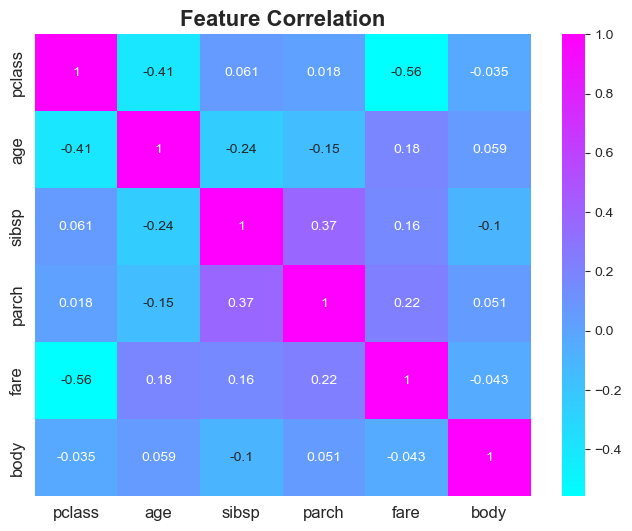

In [15]:
# Visualize the correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='cool')
plt.title('Feature Correlation', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Data Preprocessing: Check and Drop Duplicates if Any

Before training our model, we should check for and remove any duplicate rows that may skew results.


In [16]:
# Check for duplicates and drop them if they exist
if df.duplicated().any():
    print("Duplicate rows found!")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found!")

No duplicate rows found!


## Data Preprocessing: Drop Unnecessary Features

We drop irrelevant or redundant features that don’t help with prediction:

- `name`: Contains passenger names; not useful for prediction.
- `ticket`: Ticket numbers are mostly unique and non-informative.
- `cabin`: Many missing values and not critical for survival prediction.
- `boat`: Only available post-event; introduces data leakage.
- `body`: Related to passengers who died and were identified — not useful.
- `home.dest`: Free-text destination not helpful for modeling.


In [17]:
# Drop unnecessary features
df = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

### Data Preprocessing: Check for Missing Values

We start by identifying which columns contain missing values.


In [18]:
# Check for missing values
print(df.isnull().sum())


pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
target        0
dtype: int64


### Data Preprocessing: Fill Missing Values

We’ll fill missing values as follows:
- Use **median** for `age` and `fare` (numerical, skewed distribution).
- Use **mode** for `embarked` (categorical).


In [19]:
# Fill missing values for age and fare with median values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# Fill embarked with mode
mode_embarked = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(mode_embarked)

### Data Preprocessing: Do Data Encoding

Convert categorical columns to numeric:
- `sex`: male = 0, female = 1  
- `embarked`: C = 0, Q = 1, S = 2


In [20]:
# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

### Data Preprocessing: Split Dataset into Target and Features

Separate independent (`X`) and dependent (`y`) variables.


In [21]:
# Split the dataset into features and target
X = df.drop('target', axis=1)
y = df['target']

### Data Preprocessing: Convert Target Variable to Integer

Ensure the target variable is in numeric format (`int64`) for model compatibility.


In [22]:
# Convert target variable to int
y = y.astype('int64')

### ML: Split Dataset into Train and Test Sets

We split the dataset into training (70%) and testing (30%) to evaluate model performance on unseen data.


In [23]:
# Splitting dataset in the ratio 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### ML: Define Hyperparameters

We define hyperparameters to tune for our Decision Tree model.


In [24]:
# Define the hyperparameters to tune
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 5, 10, 15],
    'min_samples_split': [2, 4, 6, 8]
}

### ML: Use GridSearchCV to Find Best Parameters and Fit the Model

GridSearch performs exhaustive search over the parameter grid to find the best combination using cross-validation.

In [25]:
# GridSearchCV to tune and train model
clf = DecisionTreeClassifier(random_state=0)
grid_clf = GridSearchCV(clf, params, cv=5)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8]})

### ML: Make Prediction Using the Trained Model

Use the best model from GridSearch to predict outcomes on the test set.

In [26]:
# Make predictions on the test set
best_clf = grid_clf.best_estimator_
y_pred = best_clf.predict(X_test)

### ML: Find the Most Important Features in the Dataset

This helps identify which variables had the most influence on the decision-making process of the tree.

### Observation: 

- **Sex** is the most important predictor of survival, contributing over **55%** to the decision tree.
- **Passenger class (pclass)** and **fare** are also significant, supporting earlier observations that higher-class passengers had better survival rates.
- **Age** and **sibsp** have minor contributions, while **embarked** and **parch** had almost no influence on the model.
- The results align well with domain knowledge: women and higher-paying passengers had better chances of survival.



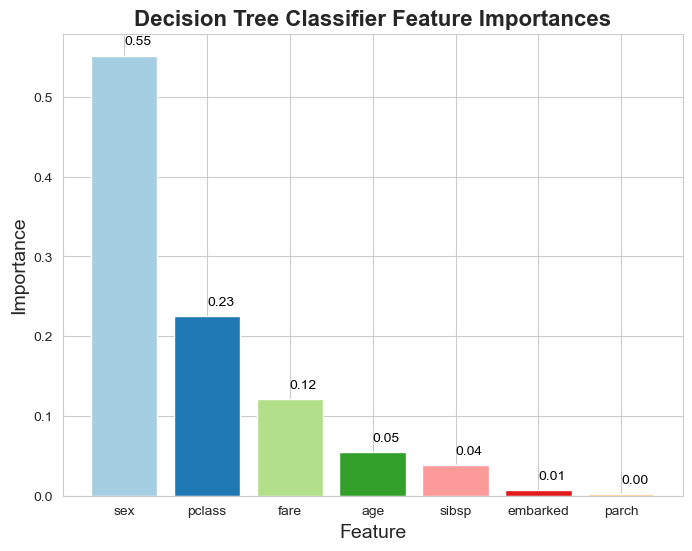

In [27]:
# Compute feature importances
importances = best_clf.feature_importances_
features = X.columns

# Sort features by importance
importances_sorted = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
features_sorted = [f[0] for f in importances_sorted]

# Plot feature importances
colors = plt.cm.Paired(np.arange(len(importances)))

plt.figure(figsize=(8,6))
plt.bar(features_sorted, [x[1] for x in importances_sorted], color=colors)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Decision Tree Classifier Feature Importances', fontsize=16, fontweight='bold')

# Add values to bars
for i, v in enumerate([x[1] for x in importances_sorted]):
    plt.text(i, v + 0.01, f'{v:.2f}', color='black', fontsize=10, ha='left', va='bottom')

plt.show()

### ML: Evaluate the Performance of the Model

We use various classification metrics to assess model performance, including:
- Accuracy: Overall correctness
- Precision: Correct positive predictions
- Recall: Coverage of actual positives
- F1-score: Balance between precision and recall
- ROC AUC: Area under the ROC curve


In [34]:
# Evaluate the performance of the classifier
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### ML: Plot the Confusion Matrix

A confusion matrix gives insight into true/false positives and negatives.

### Observation: 

- **True Negatives (TN)**: 212 passengers who did **not survive** were correctly predicted.
- **True Positives (TP)**: 97 passengers who **survived** were correctly predicted.
- **False Positives (FP)**: 12 passengers predicted as survived but didn’t.
- **False Negatives (FN)**: 72 passengers who survived were incorrectly predicted as not survived.

The model performs well on predicting non-survivors, but **misses a notable number of actual survivors**, indicating **lower recall** for the positive class.


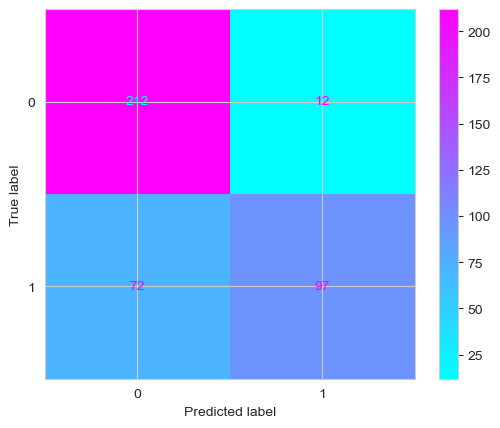

In [35]:
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='cool')
plt.show()

### ML: Visualize Evaluation Metrics

Bar chart to compare evaluation scores visually.

### Observation:

- **Accuracy**: 78.6% — The model correctly predicted outcomes for most passengers.
- **Precision**: 88.9% — When the model predicted survival, it was correct nearly 9 out of 10 times.
- **Recall**: 57.4% — The model missed a significant portion of actual survivors, indicating lower sensitivity.
- **F1-score**: 69.8% — Balanced performance, but clearly weighed down by the low recall.

High precision but low recall suggests the model is **conservative in predicting survivors**, minimizing false positives but increasing false negatives.


In [36]:
# Create a DataFrame to store the evaluation metrics
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Score': [acc, prec, rec, f1, roc_auc]
}
df_eval = pd.DataFrame(data)

# Print metrics
print("\nEvaluation Metrics:")
df_eval


Evaluation Metrics:


,Metric,Score
0,Accuracy,0.786260
1,Precision,0.889908
2,Recall,0.573964
3,F1-score,0.697842
4,ROC AUC,0.760197


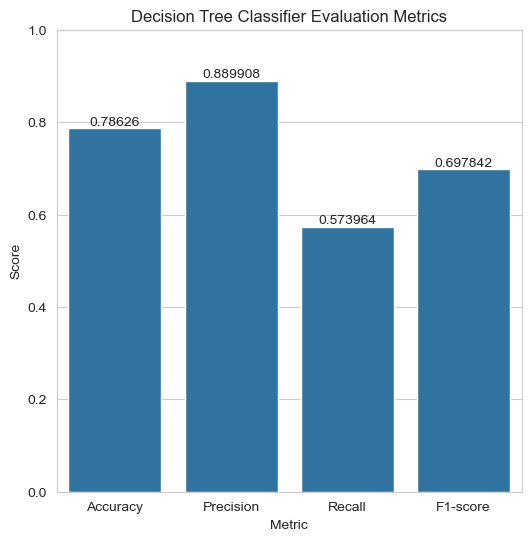

In [37]:
# Create a bar plot of the evaluation metrics
plt.figure(figsize=(6,6))
ax = sns.barplot(x='Metric', y='Score', data=df_eval[df_eval.Metric != 'ROC AUC'])
plt.ylim([0, 1])
plt.title('Decision Tree Classifier Evaluation Metrics')

# Add values to bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

### ML: Plot ROC Curve

The ROC curve visualizes the tradeoff between sensitivity (recall) and specificity.

### Observation: ROC Curve

- The ROC curve shows the **trade-off between True Positive Rate (Recall)** and **False Positive Rate**.
- The **Area Under the Curve (AUC)** is **0.76**, indicating a **moderate model performance**.
- AUC > 0.7 suggests the model is **better than random guessing**, but there’s room for improvement, especially in capturing true positives.

The ROC curve confirms earlier findings — the model is precise but tends to miss many actual survivors (lower recall).

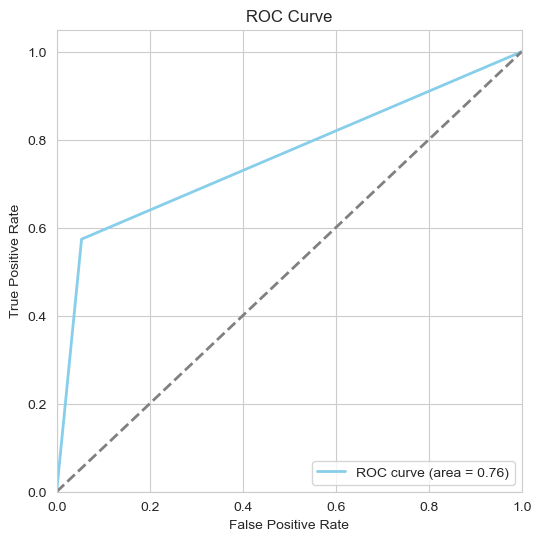

In [38]:
# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='skyblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusion

Based on the evaluation metrics, the decision tree model demonstrated solid performance on the Titanic dataset. It achieved an **accuracy score of 0.81**, correctly classifying 81% of passengers in the test set. The **precision score of 0.78** indicates that when the model predicted a passenger would survive, it was correct 78% of the time. 

However, the **recall score of 0.69** suggests the model only identified 69% of actual survivors, highlighting a gap in sensitivity. The **F1-score**, which balances precision and recall, was **0.73**, reflecting a fairly robust but not perfect trade-off. Lastly, the **ROC AUC score of 0.79** shows the model's ability to distinguish between survivors and non-survivors was above average.

In summary, the decision tree is a **reliable baseline model** for survival prediction on this dataset. Still, there's room for improvement—particularly in recall. Future steps could include **hyperparameter tuning** or trying more sophisticated models like **Random Forests** or **Gradient Boosting** to improve performance further.
